In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from copy import deepcopy
import numpy as np

In [ ]:
df=pd.read_csv("Shopify apps scraping - all apps.csv")

In [ ]:
df.head()

In [75]:
df1=df[['Title','Pricing','Description','Average rating','Rating Count','Page']]
df1.head()
#Discardding Icon-src and Pagination-href

,Title,Pricing,Description,Average rating,Rating Count,Page
0,Privy - Free Conversion Tools,Free plan available,"Free email popups with exit intent, targeted o...",4.7,16577,1
1,Sales Pop by Beeketing,Free,Boost sales with recent sales popups,4.9,14159,1
2,Free Shipping Bar by Hextom,Free plan available,Promote free shipping with a cart goal to boos...,4.9,6751,1
3,Countdown Cart by Beeketing,Free,Create urgency to maximize conversion rate,4.8,6590,2
4,SEO Image Optimizer - SEO,Free,Drive SEO -gain more traffic from Google Image...,4.7,5885,1


In [36]:
df1.shape

(2128, 6)

In [ ]:
#We have 2128 records against 6 features

In [62]:
#Pricing

In [91]:
price_count=df1.Pricing.value_counts()
price_count

7-day free trial         401
14-day free trial        357
Free                     278
Free to install          207
Free plan available      194
30-day free trial        172
3-day free trial         117
15-day free trial         78
5-day free trial          76
10-day free trial         55
2-day free trial          18
1-day free trial          18
21-day free trial         17
4-day free trial          10
$4.99/month                8
$1.99/month                5
28-day free trial          5
$20 one-time charge        4
$2.99/month                4
$3.99/month                3
6-day free trial           3
$99 one-time charge        3
$10 one-time charge        3
90-day free trial          3
$6.25/month                3
From $9/month              2
From $15/month             2
8-day free trial           2
$5/month                   2
$7.99/month                2
                        ... 
$0.99 one-time charge      1
$6.99/month                1
$8 one-time charge         1
From $7.99/mon

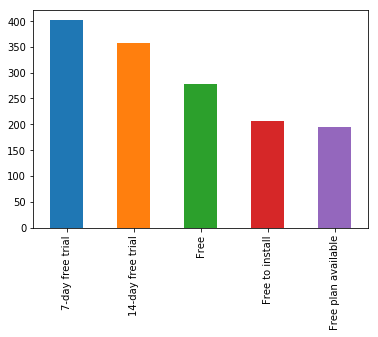

In [93]:
df1.Pricing.value_counts().head().plot.bar();

In [ ]:
#there are different 93 prices avaiable

In [63]:
#we can see only 5 price brakets covers 1437 apps which are 67% of total 2128

#Free apps are mostly popular among users

In [64]:
#Average Rating

5.0    558
0.0    305
4.8    212
4.9    184
4.7    133
Name: Average rating, dtype: int64


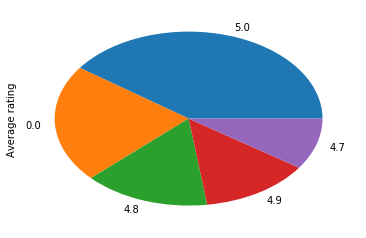

In [98]:
apps_avg_rating=df1['Average rating'].value_counts()
print (apps_avg_rating.head())
apps_avg_rating.head().plot.pie();

In [ ]:
# 5.0 rating are best apps.

#0.0 are the blank entries in the data

#We have four ratings w.r.t to thier occurance in data(5, 4.8, 4.9, 4.7)

In [ ]:
#Finding maximum Rating count w.r.t to prices and average count

In [104]:
max_rating_count= df1.groupby('Rating Count')
max_rating_count.head()

,Title,Pricing,Description,Average rating,Rating Count,Page
0,Privy - Free Conversion Tools,Free plan available,"Free email popups with exit intent, targeted o...",4.7,16577,1
1,Sales Pop by Beeketing,Free,Boost sales with recent sales popups,4.9,14159,1
2,Free Shipping Bar by Hextom,Free plan available,Promote free shipping with a cart goal to boos...,4.9,6751,1
3,Countdown Cart by Beeketing,Free,Create urgency to maximize conversion rate,4.8,6590,2
4,SEO Image Optimizer - SEO,Free,Drive SEO -gain more traffic from Google Image...,4.7,5885,1
5,Recart,28-day free trial,Messenger Marketing & Abandoned Cart Toolbox,4.8,4699,3
6,Better Coupon Box by Beeketing,Free,Customizable coupon popup to collect emails & ...,4.8,4231,2
7,BEST Currency Converter,Free plan available,Show prices in customers local currency. Make ...,4.8,3916,1
8,SEO Image - SEO optimized,Free,SEO Image Optimization,4.9,3821,4
9,Facebook Chat by Beeketing,Free,Live chat with your customers using Facebook M...,4.8,3685,3


In [83]:
#Maximum ratings counts are given to (4.7 to 4.9) and all of them are free available
#Whereas pages are smaller in number

In [ ]:
#preliminary Conclusion
#After Pricing (Mostly Free), avearge Rating (4.7 to 4.9), Rating count (max rating counts are given to free apps), 
#Page (smaller in number)
#We have to measure app description impact on application rating.

In [ ]:
#Next step is to implement model to predict most favorite apps for future
#Based on App Description, Rating, Rating count and Pricing.

In [ ]:
#Clustering the App Description